<a href="https://colab.research.google.com/github/chaiminwoo0223/Machine-Learning/blob/main/06_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
df # pandas 데이터 프레임

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [2]:
perch_full = df.to_numpy() # 데이터 프레임 객체를 numpy 배열로 변환
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split # 훈련 세트와 테스트 세트 분할(3:1)
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state = 42)

In [5]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(42, 3)
(42,)
(14, 3)
(14,)


In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]]) # 입력 데이터만 전달
print(poly.transform([[2,3]])) # 모델에 전달하는 실제 데이터로 변환

[[1. 2. 3. 4. 6. 9.]]


In [7]:
poly_2 = PolynomialFeatures(include_bias=False)
poly_2.fit([[2,3]])
print(poly_2.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [8]:
poly_3 = PolynomialFeatures(include_bias=False)
poly_3.fit([[4,5]])
print(poly_3.transform([[4,5]]))

[[ 4.  5. 16. 20. 25.]]


In [9]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input) # 훈련 세트 전달
train_poly = poly.transform(train_input) # 훈련 세트 변환
print(train_poly.shape)

(42, 9)


In [10]:
poly.get_feature_names() # 특성 조합

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [11]:
poly.get_feature_names_out() # 특성 조합

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [12]:
test_poly = poly.transform(test_input) # 테스트 세트 변환

In [13]:
from sklearn.linear_model import LinearRegression # 선형 회귀 모델
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9903183436982124
0.9714559911594134


In [14]:
poly = PolynomialFeatures(include_bias=False, degree=5) # 고차항의 최대 차수 = 5
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [15]:
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9999999999991097
-144.40579242684848


In [16]:
from sklearn.preprocessing import StandardScaler # 특성의 스케일 정규화
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [17]:
print(train_poly[:2])
print(train_scaled[:2])

[[1.96000000e+01 5.14000000e+00 3.04000000e+00 3.84160000e+02
  1.00744000e+02 5.95840000e+01 2.64196000e+01 1.56256000e+01
  9.24160000e+00 7.52953600e+03 1.97458240e+03 1.16784640e+03
  5.17824160e+02 3.06261760e+02 1.81135360e+02 1.35796744e+02
  8.03155840e+01 4.75018240e+01 2.80944640e+01 1.47578906e+05
  3.87018150e+04 2.28897894e+04 1.01493535e+04 6.00273050e+03
  3.55025306e+03 2.66161618e+03 1.57418545e+03 9.31035750e+02
  5.50651494e+02 6.97995264e+02 4.12822102e+02 2.44159375e+02
  1.44405545e+02 8.54071706e+01 2.89254655e+06 7.58555575e+05
  4.48639873e+05 1.98927329e+05 1.17653518e+05 6.95849599e+04
  5.21676772e+04 3.08540347e+04 1.82483007e+04 1.07927693e+04
  1.36807072e+04 8.09131319e+03 4.78552376e+03 2.83034868e+03
  1.67398054e+03 3.58769566e+03 2.12190560e+03 1.25497919e+03
  7.42244501e+02 4.38992857e+02 2.59637799e+02]
 [2.20000000e+01 5.88000000e+00 3.52000000e+00 4.84000000e+02
  1.29360000e+02 7.74400000e+01 3.45744000e+01 2.06976000e+01
  1.23904000e+01 1.064

In [18]:
from sklearn.linear_model import Ridge # 릿지 회귀
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9896101671037343
0.9790693977615391


In [19]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [20]:
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha) # 릿지 모델
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target)) # 훈련 점수 추가
    test_score.append(ridge.score(test_scaled,test_target)) # 테스트 점수 추가

In [21]:
print(train_score)

[0.993045525208842, 0.9917809981250542, 0.9903815817570365, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]


In [22]:
print(test_score)

[0.956938896154605, 0.98001879368729, 0.9827976465386884, 0.9790693977615391, 0.9725329582461567, 0.9627042641050291]


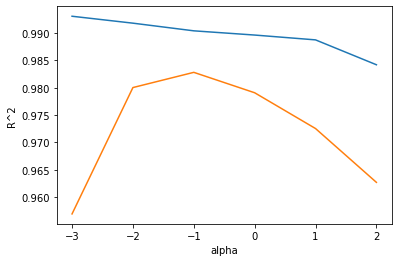

In [23]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [24]:
ridge = Ridge(alpha=0.1) # 10^-1 = 0.1
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570365
0.9827976465386884


In [25]:
from sklearn.linear_model import Lasso # 라쏘 회귀
lasso = Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.989789897208096
0.9800593698421883


In [26]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha,max_iter=10000) # 라쏘 모델
    lasso.fit(train_scaled,train_target)
    train_score.append(lasso.score(train_scaled,train_target)) # 훈련 점수 추가
    test_score.append(lasso.score(test_scaled,test_target)) # 테스트 점수 추가

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


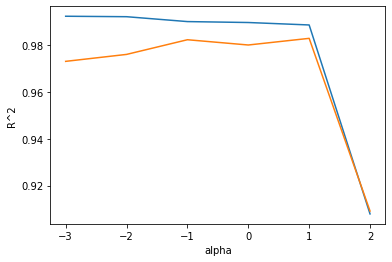

In [27]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [28]:
lasso = Lasso(alpha=10) # log10 = 1
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


In [29]:
print(lasso.coef_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]


In [30]:
print(np.sum(lasso.coef_ == 0)) # 계수가 0인 특성 개수 합계

40
